# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [39]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import move_legend

# Carregando os dados
df = pd.read_csv(r'../SINASC_RO_2019.csv')
df.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

Para categorizar a variável APGAR5, vamos usar uma função do Pandas `pd.cut`. Essa função nos permite, de forma rápida, 'categorizar' uma variável CONTÍNUA, como é o caso de APGAR5, e transformá-la numa variável qualitativa ordinal ou nominal. Vamos ver como funciona:

In [40]:
# 2) Usando pd.cut para categorizar APGAR5

# 2, i) Criando as bins e as labels, as bins sendo os intervalos e as labels os nomes de cada intervalo
bins = [0, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# 2, ii) Usando pd.cut para criar uma nova coluna que categoriza APGAR5 com base nos intervalos (bins)
df['APGAR5_Qualitativo'] = pd.cut(df['APGAR5'], bins=bins, labels=labels)
df['APGAR5_Qualitativo']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR5_Qualitativo, Length: 27028, dtype: category
Categories (4, object): ['asfixia grave' < 'asfixia moderada' < 'asfixia leve' < 'normal']

In [41]:
df['GESTACAO'].value_counts()

GESTACAO
37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

A maneira mais simples de fazer um gráfico mostrando **APGAR 5 por sexo** pra cada grupo de gestação é usando `catplot`. O catplot é uma função do seaborn que agrupa várias funções de **variáveis CATegóricas**, permitindo assim criarmos um gráfico complexo com uma linha de comando pequena.

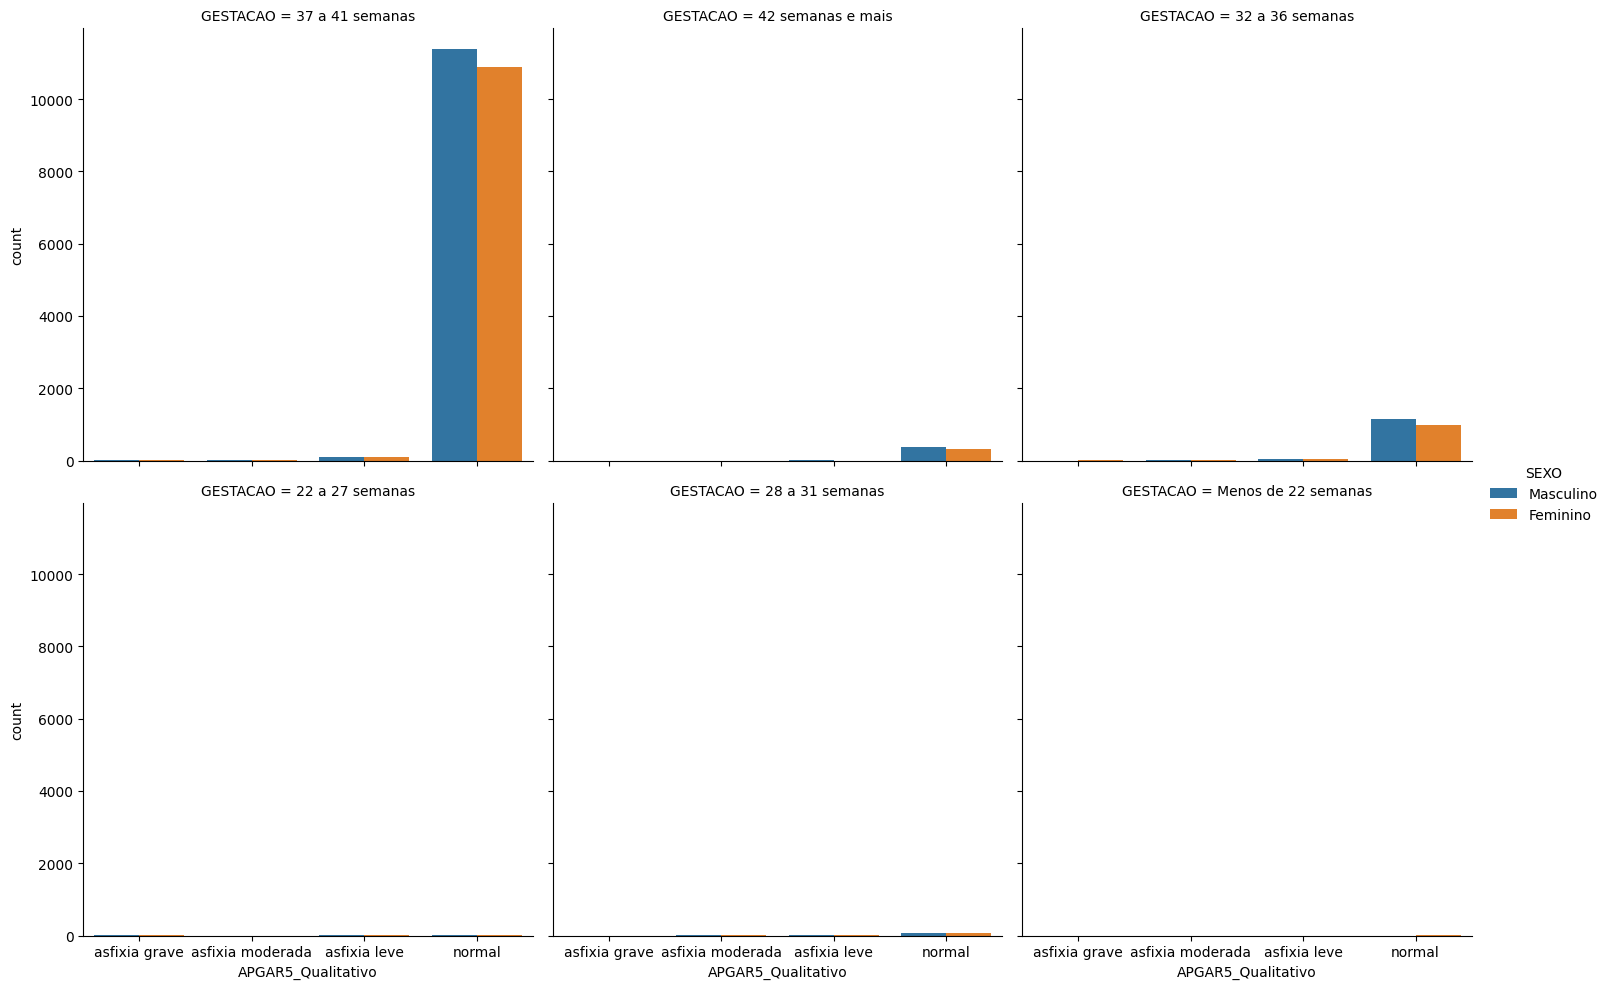

In [42]:
# 3, i) Criando o catplot com o tipo Count para criar um Countplot
# O catplot irá criar vários gráficos com base na coluna 'GESTACAO'
# Cada valor de GESTACAO vira um gráfico.
g = sns.catplot(
    data=df,                 # Fonte de dados
    kind='count',            # Tipo de gráfico é 'count', pra contar as instâncias da variável APGAR5_Qualitativo
    x='APGAR5_Qualitativo',  # Variável que estaremos contando
    hue='SEXO',              # 'Quebra' da variável que estamos contando
    col='GESTACAO',          # Coluna onde ele irá gerar cada gráfico baseado nas categorias dessa coluna
    col_wrap=3,              # Quantidade de gráficos por linha
)

# 3, ii) Exibir gráfico
plt.show()


Como podemos ver, o gráfico fica difícil de enxergar devido ao fato e que a maioria dos dados de GESTACAO estão concentrados no grupo "37 a 41 semanas". Para resolver isso e melhorar a visualização, podemos adicionar o parâmetro `sharey=False`, que fará com que cada gráfico NÃO compartilhe o Eixo Y, e cada gráfico seja individual:

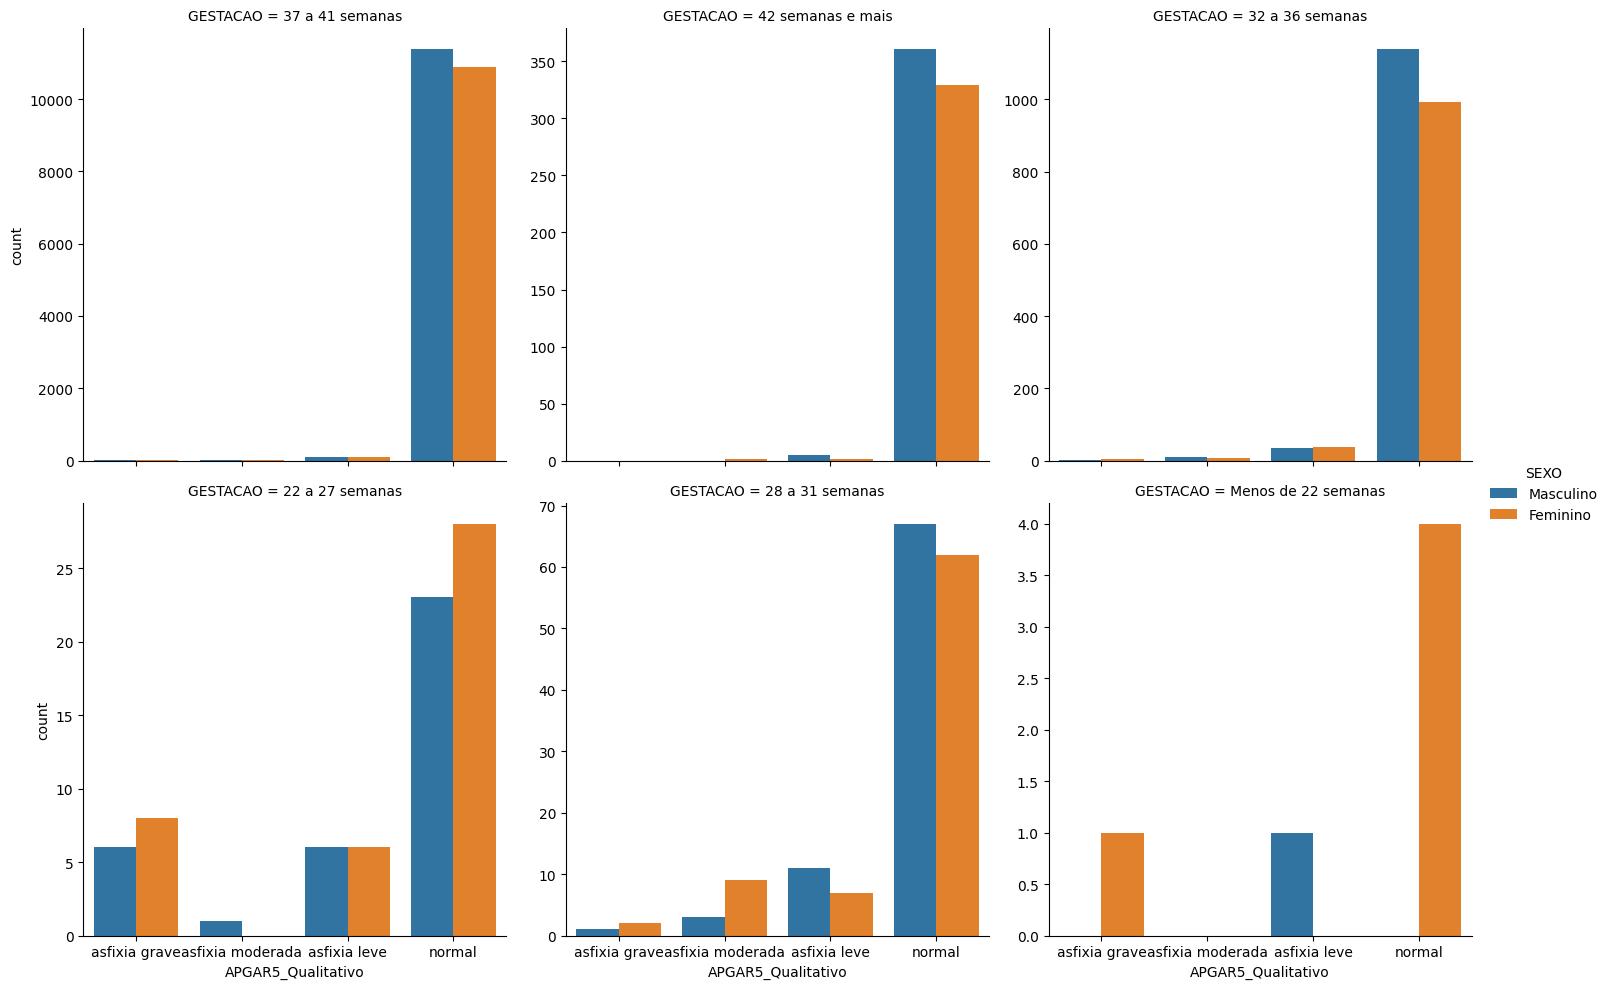

In [43]:
# 3, iii) Gráfico com sharey=False
g = sns.catplot(
    data=df,                 # Fonte de dados
    kind='count',            # Tipo de gráfico é 'count', pra contar as instâncias da variável APGAR5_Qualitativo
    x='APGAR5_Qualitativo',  # Variável que estaremos contando
    hue='SEXO',              # 'Quebra' da variável que estamos contando
    col='GESTACAO',          # Coluna onde ele irá gerar cada gráfico baseado nas categorias dessa coluna
    col_wrap=3,              # Quantidade de gráficos por linha
    sharey=False
)


plt.show()

Por fim, para melhorar ainda mais a visualização, vamos filtrar fora do gráfico os dados quando APGAR5_Qualitativo = 'normal', por que eles são a maioria dominante em todos os gráficos. Assim, teremos uma análise **específica dos casos onde NÃO É UM NÍVEL NORMAL**.

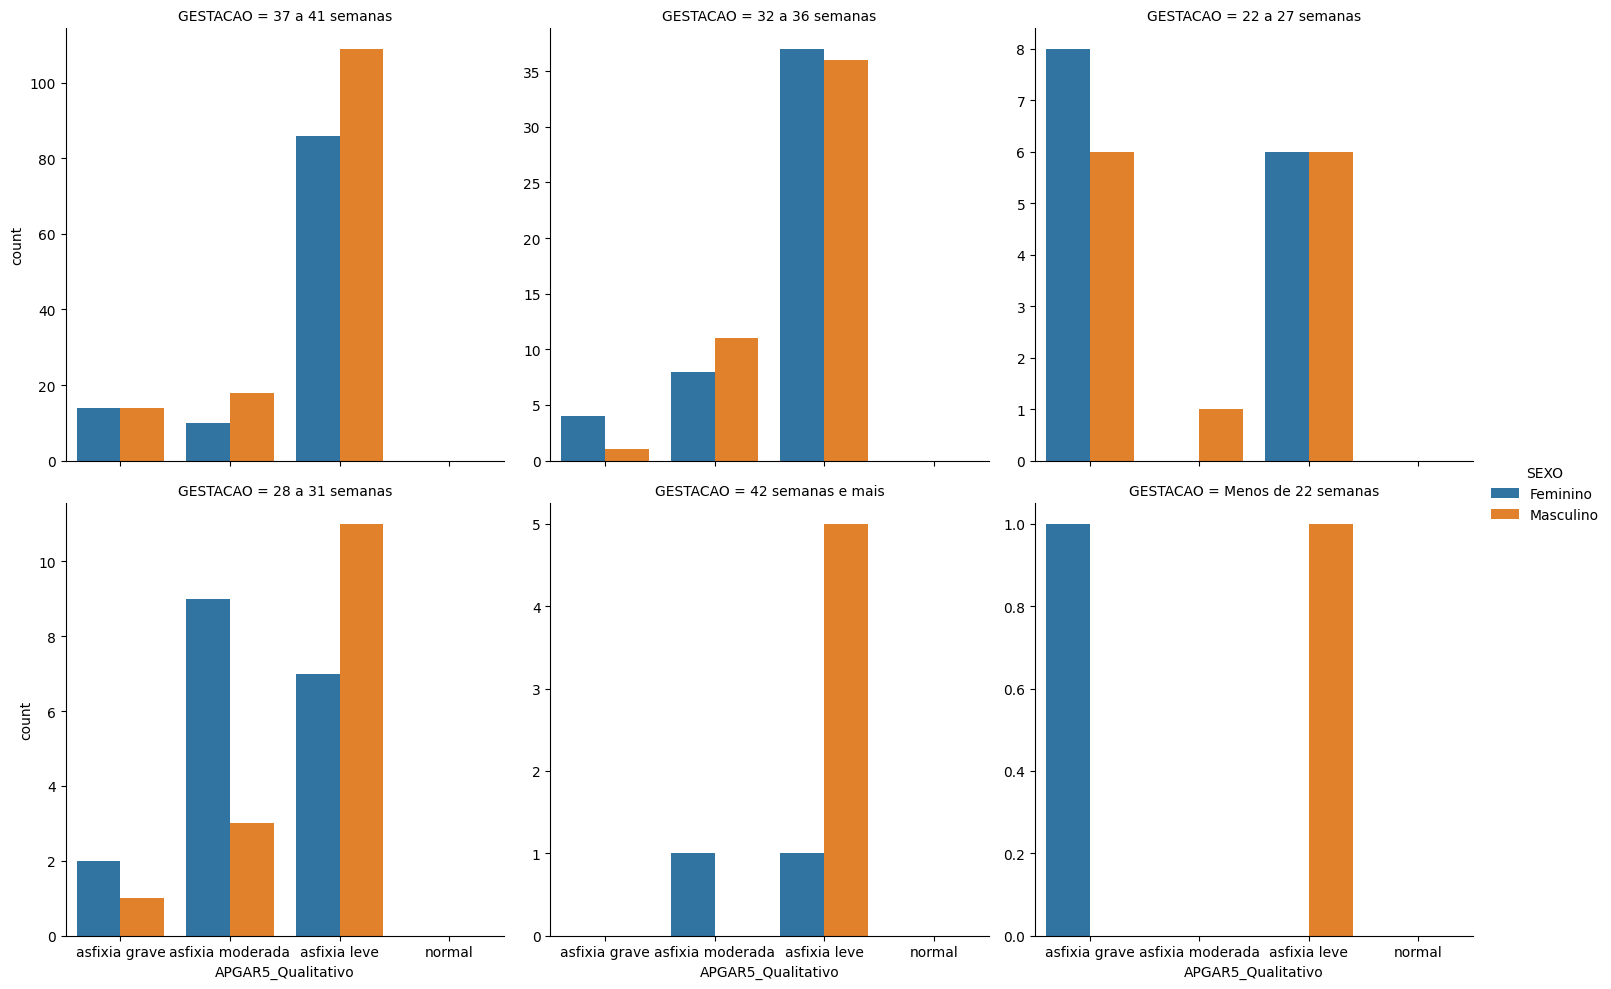

In [44]:
# 3, V) Criando o gráfico apenas para valores onde o nível de asfixia NÃO é normal.

# 3, VI) Filtra apenas os casos em que 'APGAR5_Qualitativo' NÃO é 'normal'
df_nao_normal = df[df['APGAR5_Qualitativo'] != 'normal']

# 3, VII) Cria o catplot usando o DataFrame filtrado
g = sns.catplot(
    data=df_nao_normal,
    kind='count',
    x='APGAR5_Qualitativo',
    hue='SEXO',
    col='GESTACAO',
    col_wrap=3,
    sharey=False
)

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [45]:
# 4) Criando uma crosstab com APGAR5 e GESTACAO
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_Qualitativo'])
tabela_cruzada

APGAR5_Qualitativo,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,14,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,6,19,73,2134
37 a 41 semanas,28,28,196,22266
42 semanas e mais,0,1,6,690
Menos de 22 semanas,1,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [46]:
# 5) Calculando os percentuais de cada APGAR5 para cada GESTACAO
tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)

APGAR5_Qualitativo,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,0.179487,0.012821,0.153846,0.653846
28 a 31 semanas,0.018519,0.074074,0.111111,0.796296
32 a 36 semanas,0.002688,0.008513,0.032706,0.956093
37 a 41 semanas,0.001243,0.001243,0.008704,0.988809
42 semanas e mais,0.000000,0.001435,0.008608,0.989957
Menos de 22 semanas,0.166667,0.000000,0.166667,0.666667


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Vamos primeiro criar um gráfico que analisa as frequências percentuais de APGAR5_Qualitativo pra cada grupo de gestação:

<Axes: xlabel='GESTACAO'>

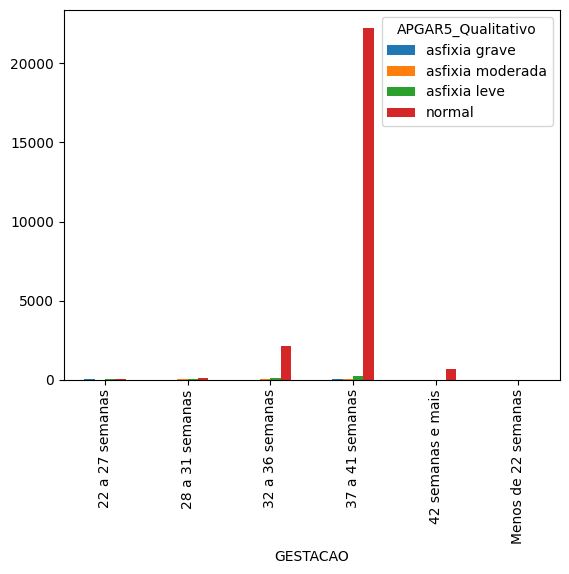

In [47]:
# 5, i) Criando um gráfico de barras com os dados das frequências
tabela_cruzada.plot.bar()

Vamos remover os casos onde a asfixia é normal, para averiguarmos apenas os casos onde houve asfixia, e usar isso percentualmente.

<Axes: xlabel='GESTACAO'>

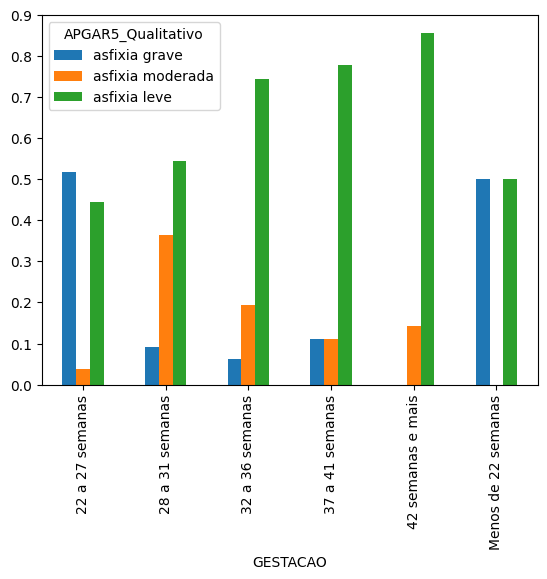

In [48]:
# 5, i) Criando o filtro de APGAR5_Qualitativo
df_filtrado = df[df['APGAR5_Qualitativo'] != 'normal']

# 5, ii) Criando a crosstab com os dados filtrados
tabela_cruzada_com_asfixia = pd.crosstab(df_filtrado['GESTACAO'], df_filtrado['APGAR5_Qualitativo'])
tabela_cruzada_com_asfixia_percentual = tabela_cruzada_com_asfixia.div(tabela_cruzada_com_asfixia.sum(axis=1), axis=0)
tabela_cruzada_com_asfixia_percentual.sort_values(by='GESTACAO')

# 5, iii) Criando o gráfico
tabela_cruzada_com_asfixia_percentual.plot.bar()

Os dados mostram que, crianças nascidas com menos de 27 semanas tendem a ter mais casos de `asfixia grave` e `asfixia moderada`: O recorde de casos de asfixia grave se dão entre **menos de 22 semanas a 27 semanas**, enquanto que asfixia moderada é mais comum entre 28 a 31 semanas. Com 37 semanas ou mais de gestação, asfixia é raro, e quando ocorre, é geralmente leve.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

A ideia aqui foi usar `boxplot` para comparar a variável categórica APGAR5_Qualitativo, com o peso do bebê que é uma variável quantitativa contínua. Assim, pra cada APGAR5_Qualitativo, veremos a distribuição do peso do bebê.

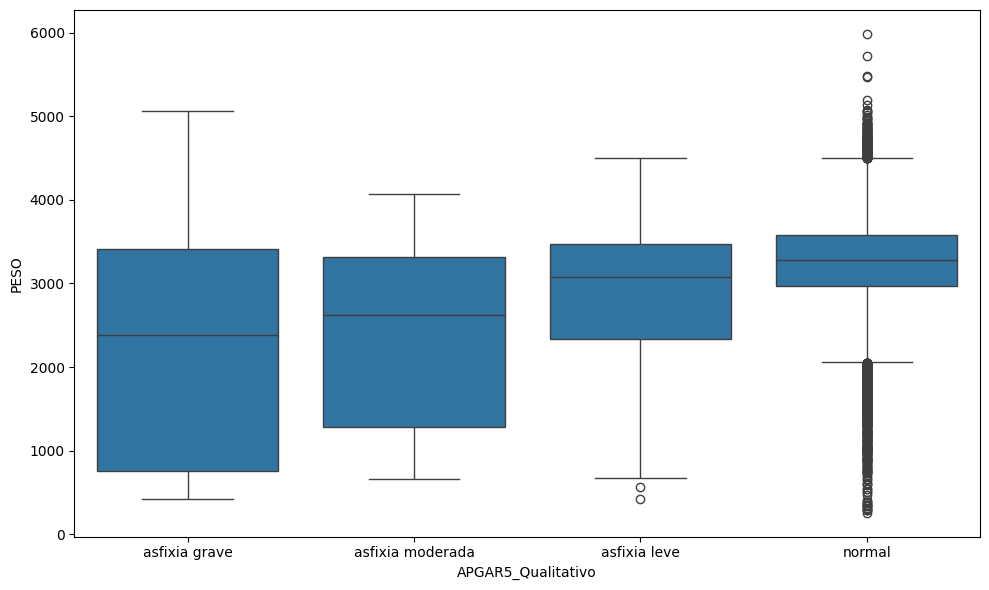

In [50]:
# 7, i) Criando o boxplot para peso por categorias de APGAR5
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='APGAR5_Qualitativo', y='PESO')

# Títulos e rótulos
plt.tight_layout()
plt.show()


Como podemos ver, o boxplot nos permite analisar claramente a distribuição entre os diferentes tipos de asfixia e os pesos dos bebês:
*   Quanto maior o risco de asfixia, maior a 'range' do peso do bebê para pesos baixos, ou seja, tipos de asfixia mais graves podem acontecer com bebês com peso normal, mas acontecem também com bebês com peso abaixo do padrão, enquanto tipo mais leves de asfixia ou mesmo asfixia normal, tendem a ter bebês com um peso muito menos variável e tende a ter pesos mais 'normais'.
*   Pela quantidade de nascidos vivos com asfixia = 'normal' ser alta, existem inúmeros outliers (bebês muito magros ou muito pesados).
*   Bebês muito magros ou muito pesados tem uma grande correlação com ter asfixias mais graves.